# Fluxing with PYPIT [v1.2]

In [1]:
%matplotlib inline

In [2]:
# import
from importlib import reload
import os
from matplotlib import pyplot as plt
import glob
import numpy as np

from astropy.table import Table

from pypit import fluxspec

# For the standard User (Running scripts)

### Generate the sensitivity function from an extracted standard star

#### Output is in sensfunc_file

    pypit_flux_spec sensfunc --std_file=spec1d_Feige66_KASTb_2015May20T041246.96.fits  --instr=shane_kast_blue --sensfunc_file=tmp.yaml

### Apply it to all spectra a spec1d science file

#### Output is in flux_file

    pypit_flux_spec flux --sci_file=spec1d_J1217p3905_KASTb_2015May20T045733.56.fits --sensfunc_file=tmp.yaml --flux_file=tmp.fits

### You can do it in one go if you really want..

    pypit_flux_spec sensfunc,flux --std_file=spec1d_Feige66_KASTb_2015May20T041246.96.fits --sci_file=spec1d_J1217p3905_KASTb_2015May20T045733.56.fits --sensfunc_file=tmp.yaml --flux_file=tmp.fits

### Multi-detector (DEIMOS)
    pypit_flux_spec sensfunc --std_file=spec1d_G191B2B_DEIMOS_2017Sep14T152432.fits  --instr=keck_deimos --sensfunc_file=sens.yaml --multi_det=3,7

----

# For Developers (primarily)

## To play along from here, you need the Development suite *reduced* 

### And the $PYPIT_DEV environmental variable pointed at it

In [3]:
os.getenv('PYPIT_DEV')

'/home/xavier/local/Python/PYPIT-development-suite/'

## Instantiate from spec1d file

In [4]:
std_file = os.getenv('PYPIT_DEV')+'Cooked/Science/spec1d_Feige66_KASTb_2015May20T041246.96.fits'
sci_file = os.getenv('PYPIT_DEV')+'Cooked/Science/spec1d_J1217p3905_KASTb_2015May20T045733.56.fits'

In [5]:
# nit
reload(fluxspec)
FxSpec = fluxspec.FluxSpec(std_spec1d_file=std_file, sci_spec1d_file=sci_file)

[INFO]    :: fluxspec.py 133 __init__() - Loaded 1 spectra from the spec1d standard star file: /home/xavier/local/Python/PYPIT-development-suite/Cooked/Science/spec1d_Feige66_KASTb_2015May20T041246.96.fits
[INFO]    :: fluxspec.py 140 __init__() - Loaded spectra from the spec1d science file: /home/xavier/local/Python/PYPIT-development-suite/Cooked/Science/spec1d_J1217p3905_KASTb_2015May20T045733.56.fits
[INFO]    :: fluxspec.py 156 __init__() - Spectrograph=shane_kast_blue from standard file
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.baseargflag
[INFO]    :: arparse.py 1393 run_ncpus() - Setting 7 CPUs
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.basespect
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO

## Find the standard (from the brightest spectrum)

In [6]:
std = FxSpec.find_standard()
std

[INFO]    :: arflux.py 429 find_standard() - Putative standard star has a median boxcar count of 16560.456904552237


<SpecObjExp: O479-S5009-D01-I0023 == Setup dum_config Object at 0.479 in Slit at 0.5009 with det=01, scidx=23 and objtype=unknown>

## Sensitivity Function

In [7]:
sensfunc = FxSpec.generate_sensfunc()
sensfunc

[INFO]    :: arflux.py 370 load_extinction_data() - Using mthamextinct.dat for extinction corrections.
[INFO]    :: arflux.py 300 find_standard_file() - Using standard star FEIGE66
[INFO]    :: arflux.py 406 load_standard_file() - Loading standard star file: /home/xavier/local/Python/PYPIT/pypit/data/standards/calspec/feige66_002.fits.gz
[INFO]    :: arflux.py 407 load_standard_file() - Fluxes are flambda, normalized to 1e-17
[INFO]    :: arflux.py 494 generate_sensfunc() - Masking edges
[WARNING] :: arflux.py 500 generate_sensfunc() - Should pull resolution from arc line analysis
[INFO]    :: arflux.py 504 generate_sensfunc() - Masking Balmer
[INFO]    :: arflux.py 512 generate_sensfunc() - Masking Telluric
[INFO]    :: arflux.py 519 generate_sensfunc() - Masking Below the atmospheric cutoff
[INFO]    :: arflux.py 203 bspline_magfit() - Difference between fits is 0.000163289
[WORK IN ]::
[PROGRESS]:: arflux.py 206 bspline_magfit() - Add QA for sensitivity function


{'c': [array([ 3436.90890455,  3436.90890455,  3436.90890455,  3436.90890455,
          3478.25918977,  3519.609475  ,  3560.95976022,  3602.31004545,
          3643.66033067,  3685.0106159 ,  3726.36090112,  3767.71118635,
          3809.06147157,  3850.4117568 ,  3891.76204202,  3933.11232725,
          3974.46261247,  4015.8128977 ,  4057.16318292,  4098.51346815,
          4139.86375337,  4181.2140386 ,  4222.56432382,  4263.91460905,
          4305.26489427,  4346.6151795 ,  4387.96546472,  4429.31574995,
          4470.66603518,  4512.0163204 ,  4553.36660563,  4594.71689085,
          4636.06717608,  4677.4174613 ,  4718.76774653,  4760.11803175,
          4801.46831698,  4842.8186022 ,  4884.16888743,  4925.51917265,
          4966.86945788,  5008.2197431 ,  5049.57002833,  5090.92031355,
          5132.27059878,  5173.620884  ,  5214.97116923,  5256.32145445,
          5297.67173968,  5339.0220249 ,  5380.37231013,  5421.72259535,
          5463.07288058,  5504.42316581,  5504

### Plot

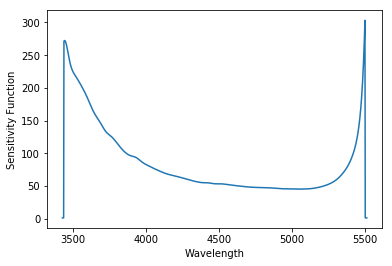

In [8]:
FxSpec.show_sensfunc()

In [9]:
FxSpec.steps

['find_standard', 'generate_sensfunc']

## Flux science

In [10]:
FxSpec.flux_science()

[INFO]    :: arflux.py 370 load_extinction_data() - Using mthamextinct.dat for extinction corrections.
[INFO]    :: arflux.py 46 apply_sensfunc() - Fluxing boxcar extraction for:
             <SpecObjExp: O500-S5009-D01-I0024 == Setup dum_config Object at 0.5 in Slit at 0.5009 with det=01, scidx=24 and objtype=unknown>
[INFO]    :: arflux.py 46 apply_sensfunc() - Fluxing optimal extraction for:
             <SpecObjExp: O500-S5009-D01-I0024 == Setup dum_config Object at 0.5 in Slit at 0.5009 with det=01, scidx=24 and objtype=unknown>


In [11]:
FxSpec.sci_specobjs

[<SpecObjExp: O500-S5009-D01-I0024 == Setup dum_config Object at 0.5 in Slit at 0.5009 with det=01, scidx=24 and objtype=unknown>]

In [12]:
FxSpec.sci_specobjs[0].optimal

{'counts': array([ 19.42804518,  18.18962436,  24.00440877, ...,  46.43813824,
         35.55421827,  49.71213535]),
 'flam': array([ 0.03144892,  0.02942343,  0.03880195, ...,  0.0456178 ,
         0.03492481,  0.04883023]),
 'flam_var': array([ 0.00036369,  0.00042585,  0.00038459, ...,  0.00015289,
         0.00014371,  0.00015233]),
 'var': array([ 138.79646991,  162.7491295 ,  147.18855791, ...,  158.43334375,
         148.93159281,  157.88640344]),
 'wave': <Quantity [ 3428.02950685, 3428.92200924, 3429.81466375,...,
             5513.32863867, 5514.43280922, 5515.53702842] Angstrom>}

### Plot

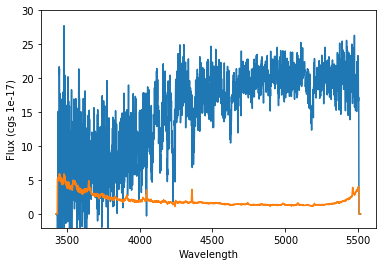

In [13]:
plt.clf()
ax = plt.gca()
ax.plot(FxSpec.sci_specobjs[0].optimal['wave'], FxSpec.sci_specobjs[0].optimal['flam'])
ax.plot(FxSpec.sci_specobjs[0].optimal['wave'], np.sqrt(FxSpec.sci_specobjs[0].optimal['flam_var']))
ax.set_ylim(-2, 30.)
# 
ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux (cgs 1e-17)')
plt.show()

### Write science frames

In [14]:
FxSpec.write_science('tmp.fits')

[INFO]    :: arsave.py 452 save_1d_spectra_fits() - Wrote 1D spectra to tmp.fits


In [15]:
FxSpec.steps

['find_standard', 'generate_sensfunc', 'flux_science', 'write_science']

### Write sensfunc to arbitrary yaml file

In [16]:
FxSpec.save_master('tmp.yaml')

[INFO]    :: fluxspec.py 393 save_master() - Wrote sensfunc to MasterFrame: tmp.yaml


## MasterFrames

In [17]:
FxSpec.setup = 'A_01_aa'

In [18]:
FxSpec.settings['masters']

{'directory': 'MF_shane_kast_blue',
 'force': False,
 'loaded': [],
 'reuse': False}

### Save

In [19]:
os.mkdir('MF_shane_kast_blue')
FxSpec.save_master()

[INFO]    :: fluxspec.py 393 save_master() - Wrote sensfunc to MasterFrame: MF_shane_kast_blue/MasterSensFunc_A_aa.yaml


### Load

In [20]:
sensfunc2, _, _ = FxSpec.load_master_frame(force=True)
sensfunc2.keys()

dict_keys(['c', 'func', 'max', 'min', 'std', 'steps', 'wave_max', 'wave_min'])

## Instantiate from a sensitivity function

In [21]:
reload(fluxspec)
FxSpec3 = fluxspec.FluxSpec(sci_spec1d_file=sci_file, sens_file='MF_shane_kast_blue/MasterSensFunc_A_aa.yaml')

[INFO]    :: fluxspec.py 140 __init__() - Loaded spectra from the spec1d science file: /home/xavier/local/Python/PYPIT-development-suite/Cooked/Science/spec1d_J1217p3905_KASTb_2015May20T045733.56.fits
[INFO]    :: fluxspec.py 159 __init__() - Spectrograph=shane_kast_blue from science file
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.baseargflag
[INFO]    :: arparse.py 1393 run_ncpus() - Setting 7 CPUs
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.basespect
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.basespect
[INFO]    :: arparse.py 75 load_file() - Loading default se

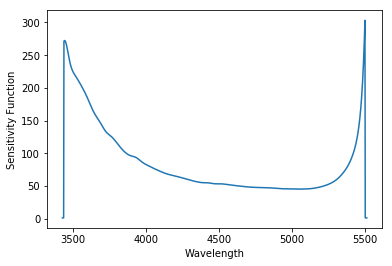

In [22]:
FxSpec3.show_sensfunc()

## Clean up


In [23]:
os.remove(FxSpec.ms_name)
os.rmdir('MF_shane_kast_blue')

----

## Additional Development

In [24]:
reload(fluxspec)
FxSpec = fluxspec.FluxSpec(std_spec1d_file=std_file, spectrograph='shane_kast_blue', sci_spec1d_file=sci_file, setup='A_01_aa')

[INFO]    :: fluxspec.py 133 __init__() - Loaded 1 spectra from the spec1d standard star file: /home/xavier/local/Python/PYPIT-development-suite/Cooked/Science/spec1d_Feige66_KASTb_2015May20T041246.96.fits
[INFO]    :: fluxspec.py 140 __init__() - Loaded spectra from the spec1d science file: /home/xavier/local/Python/PYPIT-development-suite/Cooked/Science/spec1d_J1217p3905_KASTb_2015May20T045733.56.fits
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.baseargflag
[INFO]    :: arparse.py 1393 run_ncpus() - Setting 7 CPUs
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.basespect
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 lo

In [25]:
FxSpec.std_specobjs[0].idx

'O479-S5009-D01-I0023'

In [26]:
FxSpec._set_std_obj('O479-S5009-D01-I0023')

<SpecObjExp: O479-S5009-D01-I0023 == Setup dum_config Object at 0.479 in Slit at 0.5009 with det=01, scidx=23 and objtype=unknown>

In [27]:
FxSpec._set_std_obj(1)

<SpecObjExp: O479-S5009-D01-I0023 == Setup dum_config Object at 0.479 in Slit at 0.5009 with det=01, scidx=23 and objtype=unknown>

In [28]:
FxSpec.std

<SpecObjExp: O479-S5009-D01-I0023 == Setup dum_config Object at 0.479 in Slit at 0.5009 with det=01, scidx=23 and objtype=unknown>